In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.decomposition import PCA

In [6]:
dfg = pd.read_csv('wat-r15-good.csv')
dfm = pd.read_csv('wat-r15-mals.csv')

In [7]:
dfg.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,991,3,4,0xe76c0,2,0,3,2,8,29,13,27,11,976,9,12,37,1,1,1
1,2310,3,4,0x532c0,2,0,3,2,8,29,13,27,11,2298,22,22,32,1,1,1
2,2956,3,4,0xeaec0,2,0,3,2,8,29,13,27,11,2940,27,13,32,1,1,1
3,4220,0,3,0x53fc0,0,0,3,2,8,0,0,31,15,4192,36,35,40,1,1,1
4,4228,4,0,0x53fc0,1,0,3,2,8,31,15,30,14,4224,36,34,40,1,1,1


In [8]:
dfm.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,803,0,3,0x1af7c0,0,0,3,2,8,1,1,31,15,779,16,65,66,1,1,0
1,811,4,0,0x1af7c0,1,0,3,2,8,31,15,30,14,807,16,62,66,1,1,0
2,856,0,4,0x1af7c0,2,0,3,2,8,30,14,31,15,848,16,52,66,1,1,0
3,992,3,4,0xe76c0,2,0,3,2,8,29,13,27,11,976,18,14,55,1,1,0
4,1548,3,4,0x1242c0,2,0,3,2,8,29,13,27,11,1536,30,34,71,1,1,0


In [9]:
df = dfg.append(dfm, ignore_index=True)

In [10]:
df.head()

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,991,3,4,0xe76c0,2,0,3,2,8,29,13,27,11,976,9,12,37,1,1,1
1,2310,3,4,0x532c0,2,0,3,2,8,29,13,27,11,2298,22,22,32,1,1,1
2,2956,3,4,0xeaec0,2,0,3,2,8,29,13,27,11,2940,27,13,32,1,1,1
3,4220,0,3,0x53fc0,0,0,3,2,8,0,0,31,15,4192,36,35,40,1,1,1
4,4228,4,0,0x53fc0,1,0,3,2,8,31,15,30,14,4224,36,34,40,1,1,1


In [11]:
df = df.sort_values('time')

In [12]:
df.head(50)

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
4848,803,0,3,0x1af7c0,0,0,3,2,8,1,1,31,15,779,16,65,66,1,1,0
4849,811,4,0,0x1af7c0,1,0,3,2,8,31,15,30,14,807,16,62,66,1,1,0
4850,856,0,4,0x1af7c0,2,0,3,2,8,30,14,31,15,848,16,52,66,1,1,0
0,991,3,4,0xe76c0,2,0,3,2,8,29,13,27,11,976,9,12,37,1,1,1
4851,992,3,4,0xe76c0,2,0,3,2,8,29,13,27,11,976,18,14,55,1,1,0
4852,1548,3,4,0x1242c0,2,0,3,2,8,29,13,27,11,1536,30,34,71,1,1,0
4853,1690,0,3,0x1b5bc0,0,0,3,2,8,1,1,31,15,1666,33,5,53,1,1,0
4854,1698,4,0,0x1b5bc0,1,0,3,2,9,31,15,30,14,1694,33,2,53,1,1,0
4855,1746,0,4,0x1b5bc0,2,0,3,2,8,30,14,31,15,1734,33,51,65,1,1,0
4856,2104,3,4,0x1b4ec0,2,0,3,2,8,29,13,27,11,2092,41,37,43,1,1,0


In [13]:
df.to_csv('wat-r15-pkt.csv',index=False)

In [14]:
df = pd.read_csv("wat-r15-pkt.csv")
df

,time,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,803,0,3,0x1af7c0,0,0,3,2,8,1,1,31,15,779,16,65,66,1,1,0
1,811,4,0,0x1af7c0,1,0,3,2,8,31,15,30,14,807,16,62,66,1,1,0
2,856,0,4,0x1af7c0,2,0,3,2,8,30,14,31,15,848,16,52,66,1,1,0
3,991,3,4,0xe76c0,2,0,3,2,8,29,13,27,11,976,9,12,37,1,1,1
4,992,3,4,0xe76c0,2,0,3,2,8,29,13,27,11,976,18,14,55,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9481,3247706,4,0,0xea7c0,6,0,3,2,8,31,15,0,0,3247700,9986,41,44,1,1,1
9482,3247750,0,4,0x267c0,2,0,3,2,8,30,14,31,15,3247742,9987,27,44,1,1,1
9483,3248090,3,4,0x266c0,2,0,3,2,8,29,13,27,11,3248078,9991,14,54,1,1,1
9484,3250156,3,4,0x262c0,2,0,3,2,8,29,13,27,11,3250140,10013,13,38,1,1,1


In [15]:
df.corr()

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
time,1.000000,0.009880,-0.004440,0.034123,0.017850,-0.024569,NaN,0.003575,-0.002246,-0.003805,-0.008056,-0.010783,1.000000,0.982996,-0.071305,-0.076586,NaN,NaN,0.112273
outport,0.009880,1.000000,-0.859443,0.373024,-0.026943,0.037100,NaN,0.591142,0.868858,0.878157,-0.337907,-0.411161,0.009889,0.010465,0.031398,0.063198,NaN,NaN,0.001380
inport,-0.004440,-0.859443,1.000000,-0.508662,-0.133860,0.184322,NaN,-0.649831,-0.636555,-0.663504,0.289200,0.293674,-0.004446,-0.005247,-0.025565,-0.086097,NaN,NaN,-0.003818
packet_type,0.034123,0.373024,-0.508662,1.000000,0.427690,-0.588916,NaN,0.196337,0.206380,0.223446,-0.352577,-0.331631,0.034128,0.037111,0.022019,0.039188,NaN,NaN,0.010211
flit_id,0.017850,-0.026943,-0.133860,0.427690,1.000000,-0.238179,NaN,-0.007435,-0.174368,-0.162964,0.256327,0.276961,0.017843,0.019537,-0.050029,0.043879,NaN,NaN,0.006060
flit_type,-0.024569,0.037100,0.184322,-0.588916,-0.238179,1.000000,NaN,0.010238,0.240100,0.224396,-0.352955,-0.381368,-0.024569,-0.026902,0.007365,-0.000076,NaN,NaN,-0.008344
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.003575,0.591142,-0.649831,0.196337,-0.007435,0.010238,NaN,1.000000,0.473299,0.488973,-0.197718,-0.207929,0.003579,0.003949,-0.001071,0.061732,NaN,NaN,0.000364
src_ni,-0.002246,0.868858,-0.636555,0.206380,-0.174368,0.240100,NaN,0.473299,1.000000,0.999234,-0.293786,-0.366719,-0.002234,-0.002586,0.071723,0.036630,NaN,NaN,-0.002551
src_router,-0.003805,0.878157,-0.663504,0.223446,-0.162964,0.224396,NaN,0.488973,0.999234,1.000000,-0.296841,-0.366285,-0.003793,-0.004119,0.072437,0.041497,NaN,NaN,-0.003313


In [16]:
train_X = df.drop(columns=['packet_address','time','target','pkt_count_all','pkt_count_all','pkt_max_all','src_router','src_ni'])

In [17]:
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count,pkt_max
0,0,3,0,0,3,2,8,31,15,779,16,1,1
1,4,0,1,0,3,2,8,30,14,807,16,1,1
2,0,4,2,0,3,2,8,31,15,848,16,1,1
3,3,4,2,0,3,2,8,27,11,976,9,1,1
4,3,4,2,0,3,2,8,27,11,976,18,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9481,4,0,6,0,3,2,8,0,0,3247700,9986,1,1
9482,0,4,2,0,3,2,8,31,15,3247742,9987,1,1
9483,3,4,2,0,3,2,8,27,11,3248078,9991,1,1
9484,3,4,2,0,3,2,8,27,11,3250140,10013,1,1


In [18]:
#normalization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00,0.75,0.000000,0.0,1.0,0.0,0.0,1.000000,1.000000,0.000000,0.000681,0.0,0.0
1,1.00,0.00,0.166667,0.0,1.0,0.0,0.0,0.967742,0.933333,0.000009,0.000681,0.0,0.0
2,0.00,1.00,0.333333,0.0,1.0,0.0,0.0,1.000000,1.000000,0.000021,0.000681,0.0,0.0
3,0.75,1.00,0.333333,0.0,1.0,0.0,0.0,0.870968,0.733333,0.000061,0.000000,0.0,0.0
4,0.75,1.00,0.333333,0.0,1.0,0.0,0.0,0.870968,0.733333,0.000061,0.000875,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9481,1.00,0.00,1.000000,0.0,1.0,0.0,0.0,0.000000,0.000000,0.998833,0.970053,0.0,0.0
9482,0.00,1.00,0.333333,0.0,1.0,0.0,0.0,1.000000,1.000000,0.998846,0.970151,0.0,0.0
9483,0.75,1.00,0.333333,0.0,1.0,0.0,0.0,0.870968,0.733333,0.998949,0.970540,0.0,0.0
9484,0.75,1.00,0.333333,0.0,1.0,0.0,0.0,0.870968,0.733333,0.999583,0.972679,0.0,0.0


In [19]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,1.000000,-0.859443,0.373024,-0.026943,0.037100,NaN,0.591142,-0.337907,-0.411161,0.009889,0.010465,NaN,NaN,0.001380
1,-0.859443,1.000000,-0.508662,-0.133860,0.184322,NaN,-0.649831,0.289200,0.293674,-0.004446,-0.005247,NaN,NaN,-0.003818
2,0.373024,-0.508662,1.000000,0.427690,-0.588916,NaN,0.196337,-0.352577,-0.331631,0.034128,0.037111,NaN,NaN,0.010211
3,-0.026943,-0.133860,0.427690,1.000000,-0.238179,NaN,-0.007435,0.256327,0.276961,0.017843,0.019537,NaN,NaN,0.006060
4,0.037100,0.184322,-0.588916,-0.238179,1.000000,NaN,0.010238,-0.352955,-0.381368,-0.024569,-0.026902,NaN,NaN,-0.008344
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.591142,-0.649831,0.196337,-0.007435,0.010238,NaN,1.000000,-0.197718,-0.207929,0.003579,0.003949,NaN,NaN,0.000364
7,-0.337907,0.289200,-0.352577,0.256327,-0.352955,NaN,-0.197718,1.000000,0.989444,-0.008062,-0.008580,NaN,NaN,-0.001745
8,-0.411161,0.293674,-0.331631,0.276961,-0.381368,NaN,-0.207929,0.989444,1.000000,-0.010790,-0.011321,NaN,NaN,-0.001625
9,0.009889,-0.004446,0.034128,0.017843,-0.024569,NaN,0.003579,-0.008062,-0.010790,1.000000,0.982996,NaN,NaN,0.112273


In [20]:
train_Y = df['target']

In [21]:
train_Y

0       0
1       0
2       0
3       1
4       0
       ..
9481    1
9482    1
9483    1
9484    1
9485    1
Name: target, Length: 9486, dtype: int64

In [22]:
pca = PCA(0.95)

In [23]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
principal_components = pca.transform(train_X)
principal_components

array([[-0.81580241,  0.7152673 , -0.58992768, -0.15648693, -0.21024448,
        -0.05927541],
       [ 0.32805113,  0.72494859, -0.60828361, -0.20141129, -0.23172556,
        -0.58866017],
       [-0.88652219,  0.6337225 , -0.59789902, -0.02698041, -0.06958823,
         0.0033378 ],
       ...,
       [-0.30566679,  0.52461812,  0.79831685,  0.04977214, -0.0489097 ,
        -0.30870648],
       [-0.30564053,  0.52421046,  0.80012428,  0.04973183, -0.04895507,
        -0.30871245],
       [-0.30562368,  0.52394889,  0.80128411,  0.04970595, -0.04898419,
        -0.30871629]])

In [25]:
pca.explained_variance_ratio_

array([0.39669726, 0.18899763, 0.16918913, 0.08778435, 0.08548274,
       0.05072171])

In [26]:
features = range(pca.n_components_)

Text(0, 0.5, 'Variance')

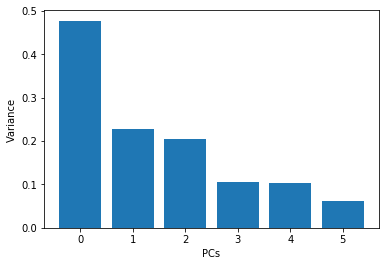

In [27]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [28]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5
0,-0.815802,0.715267,-0.589928,-0.156487,-0.210244,-0.059275
1,0.328051,0.724949,-0.608284,-0.201411,-0.231726,-0.588660
2,-0.886522,0.633722,-0.597899,-0.026980,-0.069588,0.003338
3,-0.325052,0.828994,-0.555356,0.080595,-0.014107,-0.303773
4,-0.325044,0.828871,-0.554811,0.080583,-0.014120,-0.303775
...,...,...,...,...,...,...
9481,0.820400,0.639501,0.838142,0.836748,0.666002,-0.147466
9482,-0.867147,0.329508,0.755060,-0.057788,-0.104374,-0.001593
9483,-0.305667,0.524618,0.798317,0.049772,-0.048910,-0.308706
9484,-0.305641,0.524210,0.800124,0.049732,-0.048955,-0.308712


In [29]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,target
0,-0.815802,0.715267,-0.589928,-0.156487,-0.210244,-0.059275,0
1,0.328051,0.724949,-0.608284,-0.201411,-0.231726,-0.588660,0
2,-0.886522,0.633722,-0.597899,-0.026980,-0.069588,0.003338,0
3,-0.325052,0.828994,-0.555356,0.080595,-0.014107,-0.303773,1
4,-0.325044,0.828871,-0.554811,0.080583,-0.014120,-0.303775,0
...,...,...,...,...,...,...,...
9481,0.820400,0.639501,0.838142,0.836748,0.666002,-0.147466,1
9482,-0.867147,0.329508,0.755060,-0.057788,-0.104374,-0.001593,1
9483,-0.305667,0.524618,0.798317,0.049772,-0.048910,-0.308706,1
9484,-0.305641,0.524210,0.800124,0.049732,-0.048955,-0.308712,1


In [30]:
final_df.corr()

,0,1,2,3,4,5,target
0,1.000000e+00,4.534770e-16,3.831380e-18,-5.708382e-16,-1.387584e-15,1.527081e-15,0.003980
1,4.534770e-16,1.000000e+00,-2.736769e-16,7.814721e-16,1.047323e-15,7.541767e-16,-0.021939
2,3.831380e-18,-2.736769e-16,1.000000e+00,5.206684e-16,5.896752e-16,-1.559963e-17,0.063231
3,-5.708382e-16,7.814721e-16,5.206684e-16,1.000000e+00,-8.615789e-16,9.873477e-16,0.001702
4,-1.387584e-15,1.047323e-15,5.896752e-16,-8.615789e-16,1.000000e+00,-3.411536e-16,0.002572
5,1.527081e-15,7.541767e-16,-1.559963e-17,9.873477e-16,-3.411536e-16,1.000000e+00,0.000906
target,3.979565e-03,-2.193924e-02,6.323059e-02,1.702492e-03,2.571807e-03,9.063748e-04,1.000000


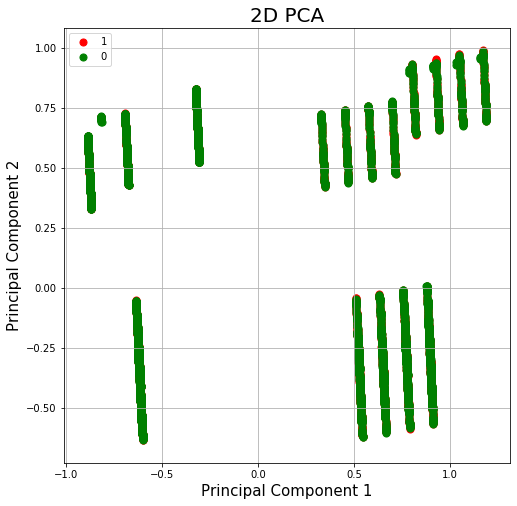

In [31]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [32]:
dup_df = df.drop(columns=['packet_address','time'])
dup_df

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,pkt_count,pkt_max,target
0,0,3,0,0,3,2,8,1,1,31,15,779,16,65,66,1,1,0
1,4,0,1,0,3,2,8,31,15,30,14,807,16,62,66,1,1,0
2,0,4,2,0,3,2,8,30,14,31,15,848,16,52,66,1,1,0
3,3,4,2,0,3,2,8,29,13,27,11,976,9,12,37,1,1,1
4,3,4,2,0,3,2,8,29,13,27,11,976,18,14,55,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9481,4,0,6,0,3,2,8,31,15,0,0,3247700,9986,41,44,1,1,1
9482,0,4,2,0,3,2,8,30,14,31,15,3247742,9987,27,44,1,1,1
9483,3,4,2,0,3,2,8,29,13,27,11,3248078,9991,14,54,1,1,1
9484,3,4,2,0,3,2,8,29,13,27,11,3250140,10013,13,38,1,1,1


In [33]:
dup_df[dup_df.duplicated()].shape

(0, 18)

In [34]:
dup_df[dup_df.duplicated()].count()

outport          0
inport           0
packet_type      0
flit_id          0
flit_type        0
vnet             0
vc               0
src_ni           0
src_router       0
dst_ni           0
dst_router       0
enq_time         0
pkt_chuck        0
pkt_count_all    0
pkt_max_all      0
pkt_count        0
pkt_max          0
target           0
dtype: int64

In [35]:
seed = 7
np.random.seed(seed)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.32, random_state=seed, shuffle=True)

In [37]:
model = Sequential()

In [38]:
n_cols = train_X.shape[1]
n_cols

13

In [39]:
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)

In [41]:
model.fit(x_train, y_train, epochs=200, validation_split=0.4)

Train on 3870 samples, validate on 2580 samples
Epoch 1/200
3870/3870 [==============================] - 1s 274us/step - loss: 0.2498 - accuracy: 0.5096 - val_loss: 0.2499 - val_accuracy: 0.5151
Epoch 2/200
3870/3870 [==============================] - 0s 103us/step - loss: 0.2498 - accuracy: 0.5178 - val_loss: 0.2498 - val_accuracy: 0.5202
Epoch 3/200
3870/3870 [==============================] - 0s 93us/step - loss: 0.2498 - accuracy: 0.5196 - val_loss: 0.2498 - val_accuracy: 0.5209
Epoch 4/200
3870/3870 [==============================] - 0s 95us/step - loss: 0.2498 - accuracy: 0.5194 - val_loss: 0.2498 - val_accuracy: 0.5244
Epoch 5/200
3870/3870 [==============================] - 0s 97us/step - loss: 0.2497 - accuracy: 0.5209 - val_loss: 0.2497 - val_accuracy: 0.5275
Epoch 6/200
3870/3870 [==============================] - 0s 92us/step - loss: 0.2497 - accuracy: 0.5253 - val_loss: 0.2497 - val_accuracy: 0.5205
Epoch 7/200
3870/3870 [==============================] - 0s 81us/step - lo

In [42]:
scores = model.evaluate(x_test, y_test, verbose=0)

In [43]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 86.73%


In [45]:
dff = pd.read_csv('wat-r15-pkt.csv',nrows=500)

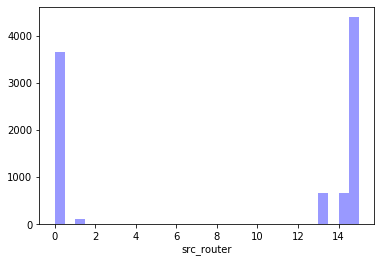

In [46]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

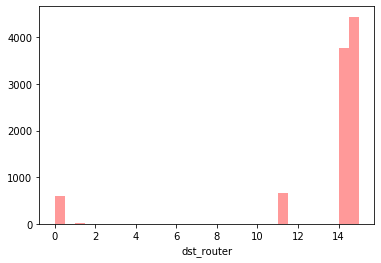

In [47]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

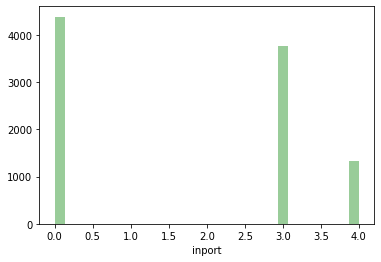

In [48]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

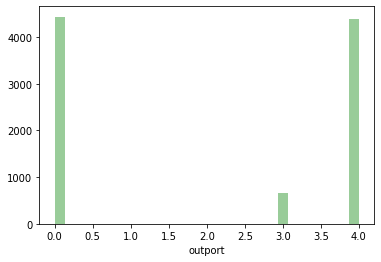

In [49]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

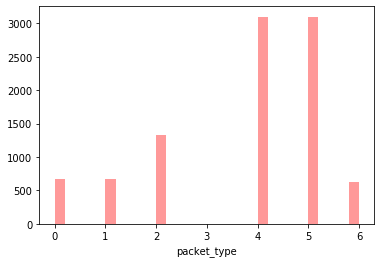

In [51]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='red')